## Problem Set 3 (Part 1 of 2): Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managmentment business, it is important to know how to access finacial data that is realtime and interactive. In this problem set we will access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [1]:
api_key = "OD2KNXZMD9UO29TK"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [2]:
ticker = "ROKU"

Import the appropriate libraries in the lines below each comment:

In [4]:
# pandas
import pandas as pd
# requests
import requests
# alpha_vantage TimeSeries class
from alpha_vantage.timeseries import TimeSeries
# matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#### Access API through an HTTP request

Assign the API url to the variable "link".
<br />(refer to the Alpha Vantage documention)
<br />
<br />Format the url string to include the "api_key" variable and the "ticker" variable Reassign the url u

In [5]:
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=1min&apikey={api_key}"
print(link)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=ROKU&interval=1min&apikey=OD2KNXZMD9UO29TK


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [6]:
ROKU = requests.get(link)

Print the HTTP response:

In [7]:
print(ROKU)

<Response [200]>


Print the data:

In [8]:
print(ROKU.text)

{
    "Meta Data": {
        "1. Information": "Intraday (1min) open, high, low, close prices and volume",
        "2. Symbol": "ROKU",
        "3. Last Refreshed": "2019-09-23 16:00:00",
        "4. Interval": "1min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (1min)": {
        "2019-09-23 16:00:00": {
            "1. open": "107.4400",
            "2. high": "107.4500",
            "3. low": "107.1900",
            "4. close": "107.3400",
            "5. volume": "261336"
        },
        "2019-09-23 15:59:00": {
            "1. open": "107.4272",
            "2. high": "107.4800",
            "3. low": "107.3900",
            "4. close": "107.4300",
            "5. volume": "129086"
        },
        "2019-09-23 15:58:00": {
            "1. open": "107.3517",
            "2. high": "107.6632",
            "3. low": "107.3129",
            "4. close": "107.4818",
            "5. volume": "125483"
        },
        "2019-09-2

______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier. Assign your API key to the key argument. Use "pandas" as an output format.

In [9]:
ts = TimeSeries(key= api_key,output_format='pandas')

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [10]:
data, meta_data = ts.get_intraday(symbol=ticker ,interval='1min', outputsize='compact')

Print the data:

In [12]:
print(data)

                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2019-09-23 14:21:00  109.1900  109.2400  108.7800  108.8600    63404.0
2019-09-23 14:22:00  108.8618  108.9543  108.7941  108.8518    40199.0
2019-09-23 14:23:00  108.8500  109.0000  108.8500  108.9000    24795.0
2019-09-23 14:24:00  108.9500  109.3800  108.8901  109.3000    55460.0
2019-09-23 14:25:00  109.2921  109.3000  109.1101  109.2000    56254.0
2019-09-23 14:26:00  109.2300  109.2400  109.0600  109.1500    21221.0
2019-09-23 14:27:00  109.0900  109.0900  108.8300  108.8500    67979.0
2019-09-23 14:28:00  108.8500  108.9399  108.8200  108.8928    18364.0
2019-09-23 14:29:00  108.8901  109.1558  108.8856  109.0271    33967.0
2019-09-23 14:30:00  109.0323  109.0900  108.9100  108.9410    17491.0
2019-09-23 14:31:00  108.9218  109.0343  108.7741  108.8018    41210.0
2019-09-23 14:32:00  108.8200  108.8400  108.7300  108.7599    27106.0
2019-0

Plot one column of the time series data with the ticket symbol as the title of the graph.
<br />(refer to prior problem set examples)

Text(0.5, 1.0, 'ROKU')

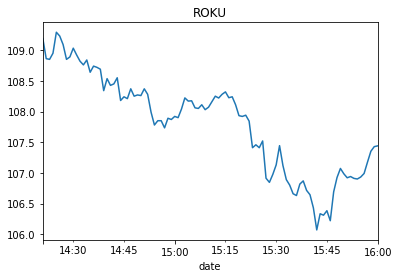

In [15]:
data['1. open'].plot()
plt.title(ticker)

______

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [17]:
data.to_excel("my_ROKU_stock_data.xlsx")